 **TIỀN XỬ LÝ DATA**

In [1]:
pip uninstall scikit-learn imbalanced-learn -y


Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Found existing installation: imbalanced-learn 0.13.0
Uninstalling imbalanced-learn-0.13.0:
  Successfully uninstalled imbalanced-learn-0.13.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn==1.2.2 imbalanced-learn==0.10.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 84.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 16.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, precision_score, confusion_matrix, recall_score
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
import xgboost as xgb

**Reading .csv file**

In [4]:
data = pd.read_csv("/kaggle/input/diabetes-dataset/diabetes_prediction_dataset.csv")
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [5]:
count = data['diabetes'].value_counts()
print(count)

diabetes
0    91500
1     8500
Name: count, dtype: int64


**Exploring Data**

In [6]:
data.shape

(100000, 9)

In [7]:
data.isna().sum()
#Không có cột nào bị thiếu giá trị

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
#Check kiểu dữ liệu
data.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [10]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [11]:
# Đặt lại tên cho các cột

data.columns = ['gender', 'age', 'hypertension', 
                'heart_disease', 'smoking_history','bmi_score', 
                'haemoglobin_level', 'blood_glucose_level', 'is_diabetic']

In [12]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi_score,haemoglobin_level,blood_glucose_level,is_diabetic
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [13]:
#Kiểm tra về giới tính
data.gender.value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [14]:
data.age.value_counts()

age
80.00    5621
51.00    1619
47.00    1574
48.00    1568
53.00    1542
         ... 
1.00       83
0.48       83
0.40       66
0.16       59
0.08       36
Name: count, Length: 102, dtype: int64

**Chuyển age từ float sang int**

In [15]:
data.age = data.age.astype(int)
data.age.dtype

dtype('int64')

In [16]:
data.age.value_counts()

age
80    5621
51    1619
47    1574
48    1568
53    1542
      ... 
76     733
77     730
75     721
78     682
79     621
Name: count, Length: 81, dtype: int64

In [17]:
print(data.age.max())
print(data.age.min())

80
0


In [18]:
#Tiền sử huyết áp
data.hypertension.value_counts()

hypertension
0    92515
1     7485
Name: count, dtype: int64

In [19]:
#Tim mạch
data.heart_disease.value_counts()

heart_disease
0    96058
1     3942
Name: count, dtype: int64

In [20]:
# Hút thuốc

data.smoking_history.value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [21]:
#Xử lý dữ liệu hút thuốc
def clean_smoking_history(value):
    
    if value == "No Info":
        return "no info"
    elif value == "ever":
        return "current"
    elif value == "not current":
        return "former"
    else:
        return value
    
data.smoking_history = data.smoking_history.apply(clean_smoking_history)

In [22]:
data.smoking_history.value_counts()

smoking_history
no info    35816
never      35095
former     15799
current    13290
Name: count, dtype: int64

In [23]:
#Chỉ số BMI
data.bmi_score.value_counts()

bmi_score
27.32    25495
23.00      103
27.12      101
27.80      100
24.96      100
         ...  
54.29        1
55.18        1
53.41        1
11.75        1
12.77        1
Name: count, Length: 4247, dtype: int64

In [24]:
print(data.bmi_score.max())
print(data.bmi_score.min())

95.69
10.01


In [25]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi_score,haemoglobin_level,blood_glucose_level,is_diabetic
0,Female,80,0,1,never,25.19,6.6,140,0
1,Female,54,0,0,no info,27.32,6.6,80,0
2,Male,28,0,0,never,27.32,5.7,158,0
3,Female,36,0,0,current,23.45,5.0,155,0
4,Male,76,1,1,current,20.14,4.8,155,0


In [26]:
#Nồng độ huyết sắc tố
data.haemoglobin_level.value_counts()

haemoglobin_level
6.6    8540
5.7    8413
6.5    8362
5.8    8321
6.0    8295
6.2    8269
6.1    8048
3.5    7662
4.8    7597
4.5    7585
4.0    7542
5.0    7471
8.2     661
8.8     661
9.0     654
7.5     643
6.8     642
7.0     634
Name: count, dtype: int64

In [27]:
print(data.haemoglobin_level.max())
print(data.haemoglobin_level.min())

9.0
3.5


In [28]:
#Nồng độ glucose trong máu
data.blood_glucose_level.value_counts()

blood_glucose_level
130    7794
159    7759
140    7732
160    7712
126    7702
145    7679
200    7600
155    7575
90     7112
80     7106
158    7026
100    7025
85     6901
280     729
300     674
240     636
260     635
220     603
Name: count, dtype: int64

In [29]:
print(data.blood_glucose_level.max())
print(data.blood_glucose_level.min())

300
80


**Bộ dữ liệu hiện tại đang bị mất cân bằng giữa 0 và 1 ở trường is_diabetes vì thế cần dùng các ký thuật xử lý như Over sampling/Undersampling/SMOTE**

In [30]:
#tính toán ma trận hệ số tương quan giữa các cột số
data_numeric = data.select_dtypes(include=['int64', 'float64'])
data_numeric.corr()


,age,hypertension,heart_disease,bmi_score,haemoglobin_level,blood_glucose_level,is_diabetic
age,1.000000,0.251093,0.233254,0.337747,0.101328,0.110631,0.257933
hypertension,0.251093,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233254,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi_score,0.337747,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
haemoglobin_level,0.101328,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110631,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
is_diabetic,0.257933,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


**Các biến có ý nghĩa quan trọng nhất để dự đoán tiểu đường (is_diabetic) là:**
* blood_glucose_level ( 0.419558 )
* haemoglobin_level ( 0.400660 )


*Ưu tiên các biến này trong quá trình huấn luyện mô hình.*



<Axes: >

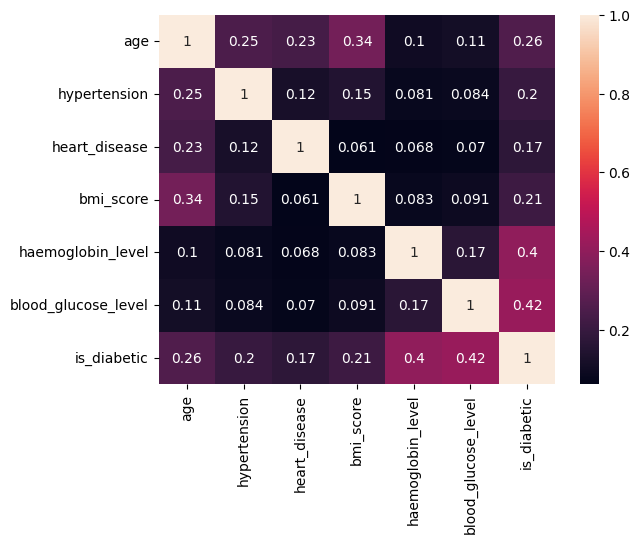

In [31]:
#Vẽ heatmap
corr_matrix = data_numeric.corr()
sns.heatmap(corr_matrix, annot = True)

In [32]:
# Chuyển hypertension và heart_disease sang object datatype. 
# Sử dụng cho phân loại nhị phân, giúp mô hình không bị hiểu là biến số học
data.hypertension = np.where((data.hypertension == 1), "Yes", "No")
data.heart_disease = np.where((data.heart_disease == 1), "Yes", "No")

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  int64  
 2   hypertension         100000 non-null  object 
 3   heart_disease        100000 non-null  object 
 4   smoking_history      100000 non-null  object 
 5   bmi_score            100000 non-null  float64
 6   haemoglobin_level    100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   is_diabetic          100000 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 6.9+ MB


In [34]:
data.to_csv("/kaggle/working/diabetes_clean.csv", index = False)

In [35]:
data = pd.read_csv("/kaggle/working/diabetes_clean.csv")
data

,gender,age,hypertension,heart_disease,smoking_history,bmi_score,haemoglobin_level,blood_glucose_level,is_diabetic
0,Female,80,No,Yes,never,25.19,6.6,140,0
1,Female,54,No,No,no info,27.32,6.6,80,0
2,Male,28,No,No,never,27.32,5.7,158,0
3,Female,36,No,No,current,23.45,5.0,155,0
4,Male,76,Yes,Yes,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80,No,No,no info,27.32,6.2,90,0
99996,Female,2,No,No,no info,17.37,6.5,100,0
99997,Male,66,No,No,former,27.83,5.7,155,0
99998,Female,24,No,No,never,35.42,4.0,100,0


**Phân tích data**

<Axes: xlabel='gender', ylabel='count'>

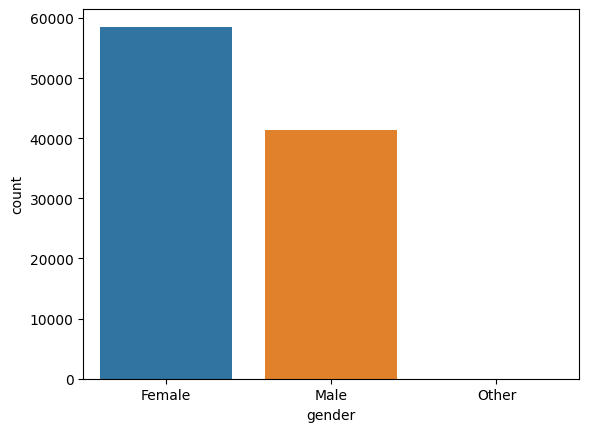

In [36]:
sns.countplot(data = data, x = "gender")

<Axes: xlabel='hypertension', ylabel='count'>

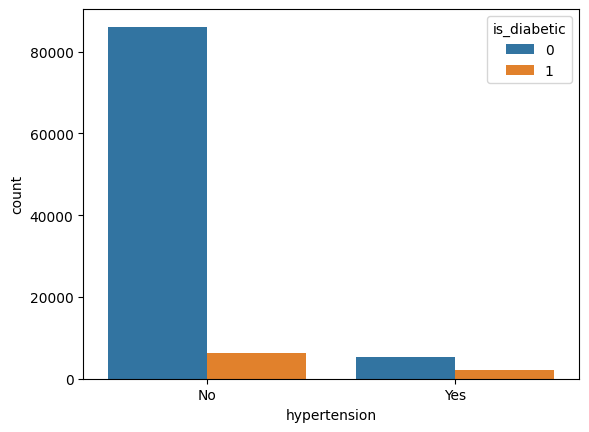

In [37]:
sns.countplot(data = data, x = "hypertension", hue = "is_diabetic")

<Axes: xlabel='heart_disease', ylabel='count'>

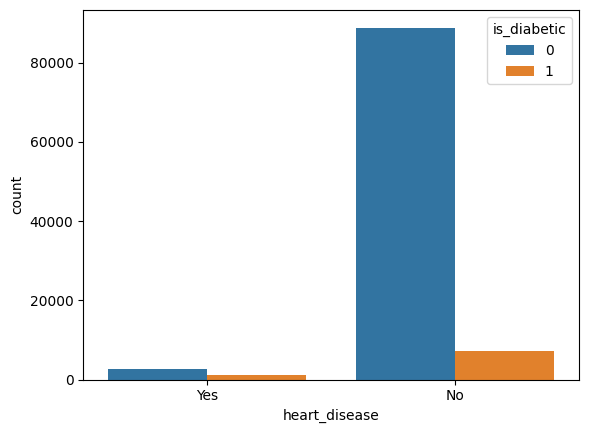

In [38]:
sns.countplot(data = data, x = "heart_disease", hue = "is_diabetic")

<Axes: xlabel='smoking_history', ylabel='count'>

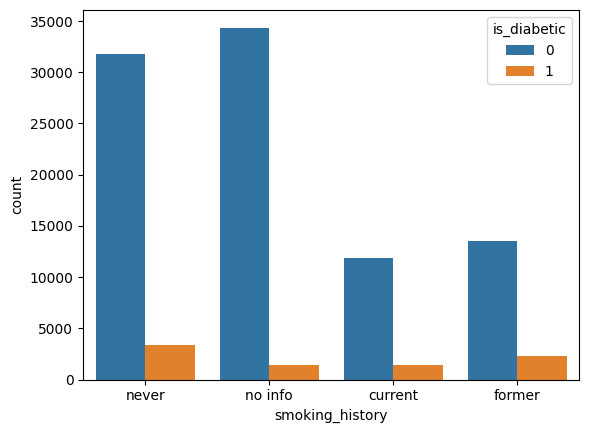

In [39]:
sns.countplot(data = data, x = "smoking_history", hue = "is_diabetic")

<Axes: xlabel='is_diabetic', ylabel='count'>

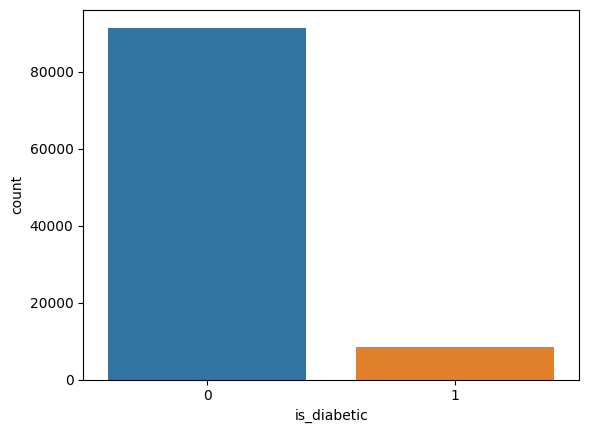

In [40]:
sns.countplot(data = data, x = "is_diabetic")

<Axes: xlabel='age'>

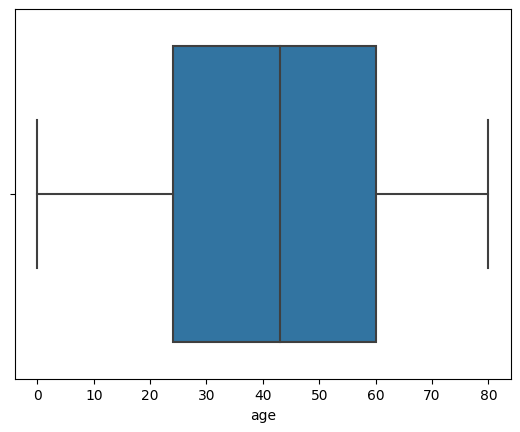

In [41]:
#Xem phân bố tuổi (age) trong dữ liệu
sns.boxplot(data = data, x = "age")

**Không bị outliers**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='age', ylabel='Count'>

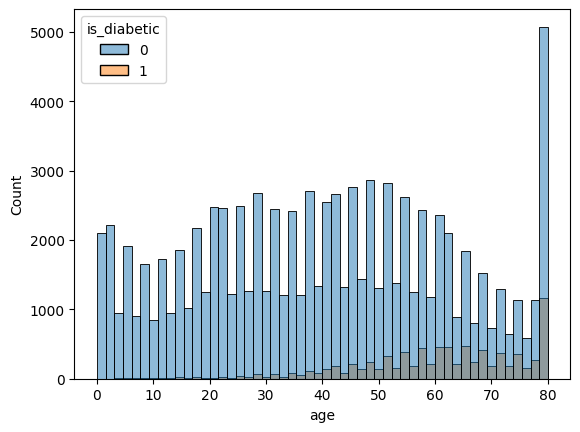

In [42]:
sns.histplot(data = data, x = "age", hue = "is_diabetic")

**Những người 80 tuổi có tỷ lệ mắc bệnh cao nhất**

<Axes: xlabel='bmi_score'>

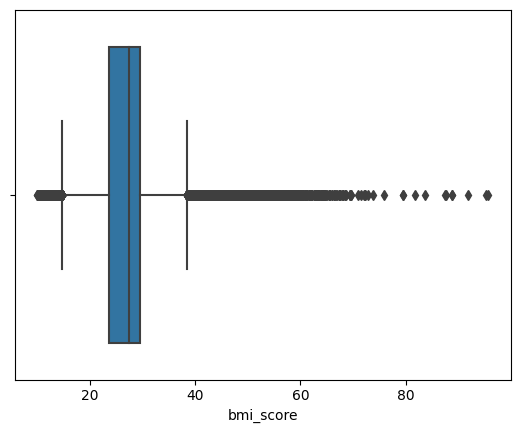

In [43]:
sns.boxplot(data = data, x = "bmi_score")

**Bị outliers ở những giá trị nằm ngoài 70**

In [44]:
# Q1 = data["bmi_score"].quantile(0.25)
# Q3 = data["bmi_score"].quantile(0.75)
# IQR = Q3 - Q1

# # Giữ lại những giá trị không phải outlier
# filtered_data = data[(data["bmi_score"] >= Q1 - 1.5 * IQR) & 
#                      (data["bmi_score"] <= Q3 + 1.5 * IQR)]


In [45]:
# sns.boxplot(data=filtered_data, x="bmi_score")


<Axes: xlabel='haemoglobin_level'>

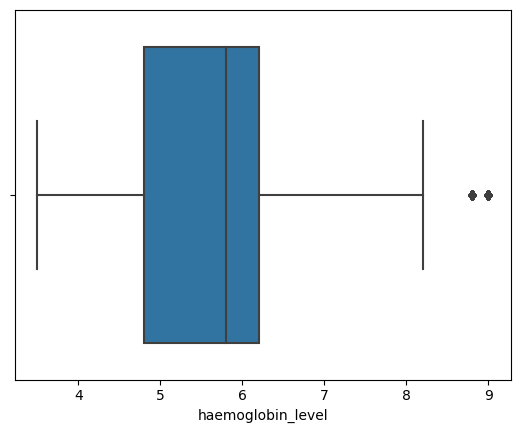

In [46]:

sns.boxplot(data = data, x = "haemoglobin_level")

**Có 2 giá trị outliers**

In [47]:
# Q1 = data["haemoglobin_level"].quantile(0.25)
# Q3 = data["haemoglobin_level"].quantile(0.75)
# IQR = Q3 - Q1

# # Giữ lại những giá trị không phải outlier
# filtered_data = data[(data["haemoglobin_level"] >= Q1 - 1.5 * IQR) & 
#                      (data["haemoglobin_level"] <= Q3 + 1.5 * IQR)]


In [48]:
# sns.boxplot(data=filtered_data, x="haemoglobin_level")


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight


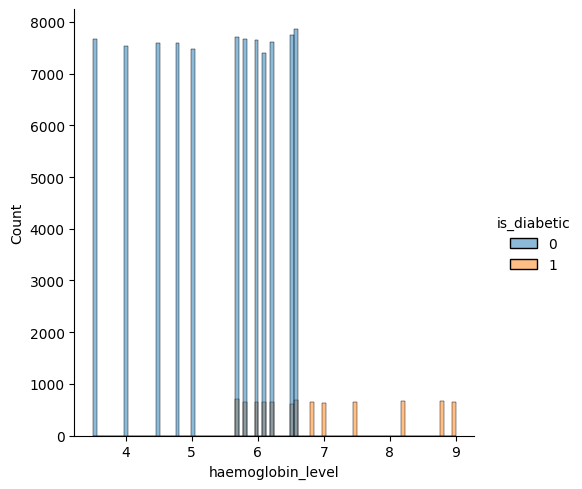

In [49]:
sns.displot(data = data, x = "haemoglobin_level", hue = "is_diabetic")

**Những người có haemoglobin_level trong khoảng 6.5 đến 9 bị bệnh. Và trong khoảng 5.5 đến 6.5 sẽ có tỷ lệ mắc bệnh**

<Axes: xlabel='blood_glucose_level'>

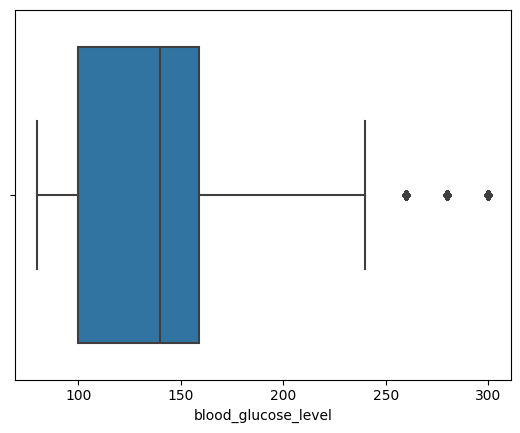

In [50]:
sns.boxplot(data = data, x = "blood_glucose_level")

**Có 3 giá trị bị outliers**

In [51]:
# Q1 = data["blood_glucose_level"].quantile(0.25)
# Q3 = data["blood_glucose_level"].quantile(0.75)
# IQR = Q3 - Q1

# # Giữ lại những giá trị không phải outlier
# filtered_data = data[(data["blood_glucose_level"] >= Q1 - 1.5 * IQR) &
#                      (data["blood_glucose_level"] <= Q3 + 1.5 * IQR)]

In [52]:
# sns.boxplot(data = filtered_data, x = "blood_glucose_level")


**Những người có blood_glucose_level từ 250 đến 300 bị mắc bệnh. Và từ 120 đến 200 sẽ có tỷ lệ mắc bệnh**

In [53]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi_score,haemoglobin_level,blood_glucose_level,is_diabetic
0,Female,80,No,Yes,never,25.19,6.6,140,0
1,Female,54,No,No,no info,27.32,6.6,80,0
2,Male,28,No,No,never,27.32,5.7,158,0
3,Female,36,No,No,current,23.45,5.0,155,0
4,Male,76,Yes,Yes,current,20.14,4.8,155,0


Text(0.5, 1.0, 'Relation between blood_glucose_level and is_diabetic')

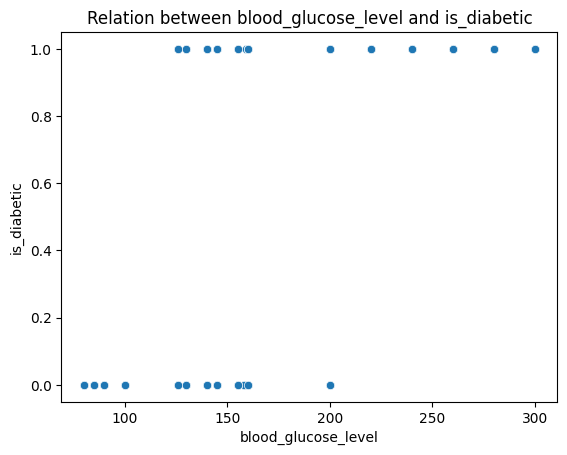

In [54]:
#biểu đồ phân tán thể hiện mối quan hệ giữa biến blood_glucose_level và is_diabetic
sns.scatterplot(data = data, x = "blood_glucose_level", y = "is_diabetic")
plt.title("Relation between blood_glucose_level and is_diabetic")

**Những người bị tiểu đường có glucose vướt quá 125. Tuy nhiên có những người từ 125-200 lại không bị tiểu đường. Đây không phải yếu tố duy nhất gây ra bệnh tiểu đường**

<Axes: xlabel='haemoglobin_level', ylabel='is_diabetic'>

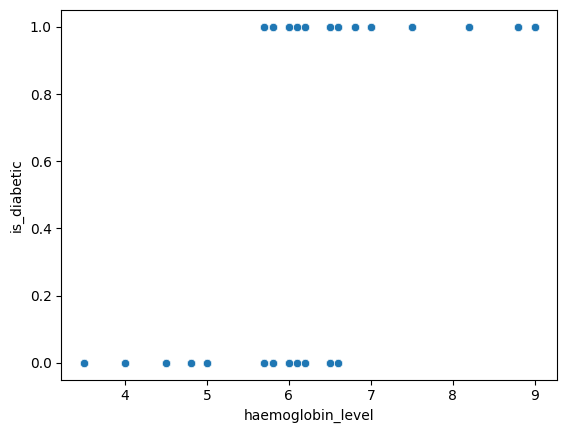

In [55]:
sns.scatterplot(data = data, x = "haemoglobin_level", y = "is_diabetic")

In [56]:
y = data.is_diabetic
X = data.drop(["is_diabetic"], axis = 1)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
display(X_train.shape)
display(X_test.shape)

display(y_train.shape)
display(y_test.shape)

(80000, 8)

(20000, 8)

(80000,)

(20000,)

In [59]:
X_train_num = X_train.select_dtypes(include = np.number)
X_test_num  = X_test.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)
X_test_cat  = X_test.select_dtypes(include = object)

In [60]:
X_train_num.head()

,age,bmi_score,haemoglobin_level,blood_glucose_level
75220,73,24.77,3.5,80
48955,80,24.60,5.7,145
44966,38,24.33,4.0,158
13568,26,18.87,5.0,100
92727,61,22.11,4.5,85


In [61]:
X_train_cat.head()

,gender,hypertension,heart_disease,smoking_history
75220,Male,No,No,former
48955,Male,No,No,never
44966,Female,No,No,current
13568,Female,No,No,former
92727,Female,Yes,No,current


**Encoding**

In [62]:
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
encoded_cat = encoder.transform(X_train_cat).toarray()
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
X_train_encoded = pd.DataFrame(encoded_cat, columns=cols)
X_train_encoded

,gender_Male,gender_Other,hypertension_Yes,heart_disease_Yes,smoking_history_former,smoking_history_never,smoking_history_no info
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
79995,1.0,0.0,0.0,0.0,0.0,1.0,0.0
79996,0.0,0.0,0.0,0.0,0.0,1.0,0.0
79997,1.0,0.0,0.0,0.0,0.0,1.0,0.0
79998,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [63]:
encoded_test_cat = encoder.transform(X_test_cat).toarray()
X_test_encoded = pd.DataFrame(encoded_test_cat, columns=cols)
X_test_encoded

,gender_Male,gender_Other,hypertension_Yes,heart_disease_Yes,smoking_history_former,smoking_history_never,smoking_history_no info
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
19995,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19996,1.0,0.0,1.0,0.0,1.0,0.0,0.0
19997,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19998,1.0,0.0,0.0,1.0,0.0,0.0,1.0


**Scaling**

In [64]:
transformer = MinMaxScaler().fit(X_train_num) 
X_train_scaled_arr = transformer.transform(X_train_num)
X_train_scaled = pd.DataFrame(X_train_scaled_arr, columns=X_train_num.columns)
X_train_scaled

,age,bmi_score,haemoglobin_level,blood_glucose_level
0,0.9125,0.180418,0.000000,0.000000
1,1.0000,0.178340,0.400000,0.295455
2,0.4750,0.175040,0.090909,0.354545
3,0.3250,0.108300,0.272727,0.090909
4,0.7625,0.147904,0.181818,0.022727
...,...,...,...,...
79995,0.6125,0.280773,0.400000,0.000000
79996,0.1875,0.221122,0.272727,0.359091
79997,0.5250,0.197164,0.418182,0.022727
79998,0.4625,0.182740,0.490909,0.354545


In [65]:
X_test_scaled_arr = transformer.transform(X_test_num)
X_test_scaled = pd.DataFrame(X_test_scaled_arr, columns=X_test_num.columns)
X_test_scaled

,age,bmi_score,haemoglobin_level,blood_glucose_level
0,0.1625,0.132135,0.418182,0.209091
1,0.0375,0.134336,0.272727,0.295455
2,0.7875,0.187141,0.000000,0.545455
3,0.0250,0.090698,0.472727,0.209091
4,0.4125,0.367559,0.490909,0.545455
...,...,...,...,...
19995,0.5500,0.145948,0.454545,0.359091
19996,0.7625,0.390784,0.000000,0.045455
19997,0.6125,0.201687,0.236364,0.090909
19998,0.9125,0.211588,0.563636,0.090909


**Concatenating encoded and scaled columns**

In [66]:
X_train_processed = pd.concat([X_train_encoded, X_train_scaled], axis = 1)
X_test_processed = pd.concat([X_test_encoded, X_test_scaled], axis = 1)

In [67]:
X_train_processed

,gender_Male,gender_Other,hypertension_Yes,heart_disease_Yes,smoking_history_former,smoking_history_never,smoking_history_no info,age,bmi_score,haemoglobin_level,blood_glucose_level
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.9125,0.180418,0.000000,0.000000
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0000,0.178340,0.400000,0.295455
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4750,0.175040,0.090909,0.354545
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.3250,0.108300,0.272727,0.090909
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.7625,0.147904,0.181818,0.022727
...,...,...,...,...,...,...,...,...,...,...,...
79995,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.6125,0.280773,0.400000,0.000000
79996,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.1875,0.221122,0.272727,0.359091
79997,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.5250,0.197164,0.418182,0.022727
79998,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.4625,0.182740,0.490909,0.354545


In [68]:
X_test_processed

,gender_Male,gender_Other,hypertension_Yes,heart_disease_Yes,smoking_history_former,smoking_history_never,smoking_history_no info,age,bmi_score,haemoglobin_level,blood_glucose_level
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.1625,0.132135,0.418182,0.209091
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0375,0.134336,0.272727,0.295455
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.7875,0.187141,0.000000,0.545455
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0250,0.090698,0.472727,0.209091
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.4125,0.367559,0.490909,0.545455
...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5500,0.145948,0.454545,0.359091
19996,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.7625,0.390784,0.000000,0.045455
19997,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.6125,0.201687,0.236364,0.090909
19998,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.9125,0.211588,0.563636,0.090909


In [69]:
y_train = y_train.reset_index(drop=True)

In [70]:
# Nếu y_train là một numpy array hoặc list, convert thành Series
if isinstance(y_train, (list, np.ndarray)):
    y_train = pd.Series(y_train, name="is_diabetic")

# Nếu là Series nhưng không có tên cột
elif isinstance(y_train, pd.Series) and y_train.name is None:
    y_train.name = "is_diabetic"

# Gộp lại thành DataFrame
train = pd.concat([X_train_processed, y_train], axis=1)

print(train.shape)
train.head()

(80000, 12)


,gender_Male,gender_Other,hypertension_Yes,heart_disease_Yes,smoking_history_former,smoking_history_never,smoking_history_no info,age,bmi_score,haemoglobin_level,blood_glucose_level,is_diabetic
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.9125,0.180418,0.000000,0.000000,0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0000,0.178340,0.400000,0.295455,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4750,0.175040,0.090909,0.354545,0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.3250,0.108300,0.272727,0.090909,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.7625,0.147904,0.181818,0.022727,0


In [71]:
y_train

0        0
1        1
2        0
3        0
4        0
        ..
79995    0
79996    0
79997    0
79998    0
79999    0
Name: is_diabetic, Length: 80000, dtype: int64

**HUẤN LUYỆN MÔ HÌNH CHƯA UNDERSAMPLING**

*DecisionTreeClassifier*

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss, classification_report, f1_score
import matplotlib.pyplot as plt


import time

max_depth = range(1, 30)

train_over_acc = []
test_over_acc = []
train_loss = []
test_loss = []

# MOI: Các list để lưu trữ thông tin về thời gian và độ phức tạp
processing_times = []
node_counts = []
leaf_counts = []


# Biến lưu kết quả tốt nhất
best_model_by_loss = None
best_test_log_loss = float('inf')
best_depth_by_loss = None

best_model_by_acc = None
best_test_acc = 0
best_depth_by_acc = None

# Vòng lặp để huấn luyện và đánh giá mô hình với các max_depth khác nhau
for depth in max_depth:
    # MOI: Bắt đầu đếm thời gian
    start_time = time.time()
    
    model = DecisionTreeClassifier(max_depth=depth, random_state=0)
    model.fit(X_train_processed, y_train)

    # MOI: Đo lường độ phức tạp của cây sau khi huấn luyện
    # model.tree_.node_count: Tổng số nút trong cây
    # model.tree_.n_leaves: Số lượng nút lá (nút đưa ra quyết định cuối cùng)
    num_nodes = model.tree_.node_count
    num_leaves = model.tree_.n_leaves

    # Tính toán Accuracy
    acc_train = model.score(X_train_processed, y_train)
    acc_test = model.score(X_test_processed, y_test)
    
    # Tính toán Log loss
    y_train_proba_1 = model.predict_proba(X_train_processed)
    y_test_proba_1 = model.predict_proba(X_test_processed)
    loss_train = log_loss(y_train, y_train_proba_1)
    loss_test = log_loss(y_test, y_test_proba_1)

    # MOI: Kết thúc đếm thời gian
    end_time = time.time()
    duration = end_time - start_time

    # Thêm các kết quả vào list
    train_over_acc.append(acc_train)
    test_over_acc.append(acc_test)
    train_loss.append(loss_train)
    test_loss.append(loss_test)
    # MOI: Thêm các thông tin mới vào list
    processing_times.append(duration)
    node_counts.append(num_nodes)
    leaf_counts.append(num_leaves)


    # Cập nhật mô hình tốt nhất theo log loss
    if loss_test < best_test_log_loss:
        best_test_log_loss = loss_test
        best_model_by_loss = model
        best_depth_by_loss = depth

    # Cập nhật mô hình tốt nhất theo accuracy
    if acc_test > best_test_acc:
        best_test_acc = acc_test
        best_model_by_acc = model
        best_depth_by_acc = depth


print("--- Báo cáo quá trình tìm kiếm siêu tham số cho Decision Tree (Chưa undersampling)---")
print("-" * 110)
print(f"{'Max Depth':<10} | {'Test Acc':<10} | {'Test LogLoss':<12} | {'Time (s)':<10} | {'Complexity (Nodes/Leaves)':<30} | {'Overfitting (Train/Test Acc)':<25}")
print("-" * 110)

for d, acc_tr, acc_te, loss_te, duration, nodes, leaves in zip(max_depth, train_over_acc, test_over_acc, test_loss, processing_times, node_counts, leaf_counts):
    overfitting_metric = f"{acc_tr:.3f} / {acc_te:.3f}"
    complexity_metric = f"{nodes} / {leaves}"
    print(f"{d:<10} | {acc_te:<10.3f} | {loss_te:<12.3f} | {duration:<10.4f} | {complexity_metric:<30} | {overfitting_metric:<25}")
print("-" * 110)
print("\n📌 Mô hình tốt nhất theo Test Accuracy:")
print(f"  ➤ max_depth = {best_depth_by_acc}, Test Accuracy = {best_test_acc:.4f}")
y_pred_acc = best_model_by_acc.predict(X_test_processed)
print(f"  ➤ Accuracy: {best_model_by_acc.score(X_test_processed, y_test):.4f}")
print(f"  ➤ F1 Score: {f1_score(y_test, y_pred_acc):.4f}")
print(f"  ➤ Độ phức tạp (Nodes/Leaves): {best_model_by_acc.tree_.node_count} / {best_model_by_acc.tree_.n_leaves}")
print(classification_report(y_test, y_pred_acc))




--- Báo cáo quá trình tìm kiếm siêu tham số cho Decision Tree (Chưa undersampling)---
--------------------------------------------------------------------------------------------------------------
Max Depth  | Test Acc   | Test LogLoss | Time (s)   | Complexity (Nodes/Leaves)      | Overfitting (Train/Test Acc)
--------------------------------------------------------------------------------------------------------------
1          | 0.954      | 0.185        | 0.0908     | 3 / 2                          | 0.954 / 0.954            
2          | 0.972      | 0.126        | 0.0919     | 5 / 3                          | 0.972 / 0.972            
3          | 0.972      | 0.116        | 0.1089     | 7 / 4                          | 0.972 / 0.972            
4          | 0.972      | 0.105        | 0.1232     | 11 / 6                         | 0.972 / 0.972            
5          | 0.972      | 0.097        | 0.1381     | 17 / 9                         | 0.972 / 0.972            
6          

*Logistic Regression*

In [73]:
import time
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, classification_report, f1_score, accuracy_score

# --- Bắt đầu thử nghiệm Logistic Regression trên DỮ LIỆU GỐC (MẤT CÂN BẰNG) ---
print("--- Bắt đầu thử nghiệm Logistic Regression trên DỮ LIỆU GỐC (MẤT CÂN BẰNG) ---")

# Dãy các giá trị C để thử nghiệm
C_values = [0.01, 0.1, 1.0, 10.0] 

# Các list để lưu trữ kết quả
train_acc_list_imb = []
test_acc_list_imb = []
f1_scores_imb = []
processing_times_imb = [] # <-- List này đã có nhưng chưa được dùng

# Biến lưu mô hình tốt nhất
best_model_lr_imb = None
best_f1_score_imb = 0
best_c_value_imb = None

for c_val in C_values:
    start_time = time.time()
    
    # Khởi tạo mô hình
    model = LogisticRegression(C=c_val, random_state=0, max_iter=1000)
    
    # Huấn luyện trên dữ liệu GỐC
    model.fit(X_train_processed, y_train)
    
    # Đánh giá trên tập huấn luyện gốc
    y_train_pred = model.predict(X_train_processed)
    acc_train = accuracy_score(y_train, y_train_pred)

    # Đánh giá trên tập kiểm thử
    y_test_pred = model.predict(X_test_processed)
    acc_test = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred, pos_label=1)
    
    duration = time.time() - start_time
    
    # Lưu trữ kết quả
    train_acc_list_imb.append(acc_train)
    test_acc_list_imb.append(acc_test)
    f1_scores_imb.append(f1)
    # SỬA LỖI: Thêm dòng sau để lưu lại thời gian
    processing_times_imb.append(duration) 
    
    # Cập nhật mô hình tốt nhất
    if f1 > best_f1_score_imb:
        best_f1_score_imb = f1
        best_model_lr_imb = model
        best_c_value_imb = c_val

# In kết quả ra bảng
# SỬA LỖI: Thêm cột 'Time (s)' vào header của bảng
print("-" * 100)
print(f"{'Giá trị C':<12} | {'Test Acc':<10} | {'F1 Score (Lớp 1)':<18} | {'Time (s)':<10}")
print("-" * 100)

for c, acc_te, f1, duration in zip(C_values, test_acc_list_imb, f1_scores_imb, processing_times_imb):
    print(f"{c:<12.3f} | {acc_te:<10.3f} | {f1:<18.3f} | {duration:<10.4f}")
print("-" * 100)

# In thông tin về mô hình tốt nhất
print("\n📌 Mô hình LR tốt nhất trên dữ liệu GỐC:")
print(f"  ➤ Giá trị C tối ưu: {best_c_value_imb}")
print(f"  ➤ F1 Score (Lớp 1) tốt nhất: {best_f1_score_imb:.4f}")
print("\n--- Báo cáo phân loại chi tiết cho mô hình tốt nhất ---")
y_pred_best_imb = best_model_lr_imb.predict(X_test_processed)
print(classification_report(y_test, y_pred_best_imb))

--- Bắt đầu thử nghiệm Logistic Regression trên DỮ LIỆU GỐC (MẤT CÂN BẰNG) ---
----------------------------------------------------------------------------------------------------
Giá trị C    | Test Acc   | F1 Score (Lớp 1)   | Time (s)  
----------------------------------------------------------------------------------------------------
0.010        | 0.948      | 0.574              | 0.3399    
0.100        | 0.958      | 0.698              | 0.4240    
1.000        | 0.959      | 0.718              | 0.8056    
10.000       | 0.959      | 0.719              | 0.8006    
----------------------------------------------------------------------------------------------------

📌 Mô hình LR tốt nhất trên dữ liệu GỐC:
  ➤ Giá trị C tối ưu: 10.0
  ➤ F1 Score (Lớp 1) tốt nhất: 0.7193

--- Báo cáo phân loại chi tiết cho mô hình tốt nhất ---
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18292
           1       0.86      0.62      0.72   

*KNN neighbours*

In [74]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score

# --- Bắt đầu thử nghiệm KNN trên DỮ LIỆU GỐC (MẤT CÂN BẰNG) ---
print("--- Bắt đầu thử nghiệm KNN trên DỮ LIỆU GỐC (MẤT CÂN BẰNG) ---")

# --- Không gian siêu tham số để tìm kiếm ---
# Chọn các số lẻ cho k để tránh trường hợp hòa phiếu
k_values = [3, 5, 7, 9, 11, 13, 15] 
weight_options = ['uniform', 'distance']

# Biến lưu mô hình tốt nhất
best_model_knn_imb = None
best_f1_score_knn_imb = 0
best_params_knn_imb = {}

print("-" * 100)
print(f"{'n_neighbors':<12} | {'weights':<12} | {'Test Acc':<10} | {'F1 Score (Lớp 1)':<18} | {'Time (s)':<10}")
print("-" * 100)

# Vòng lặp lồng nhau để thử nghiệm các sự kết hợp
for k in k_values:
    for w in weight_options:
        start_time = time.time()
        
        # Khởi tạo mô hình
        # n_jobs=-1: sử dụng tất cả các nhân CPU để tăng tốc độ
        model = KNeighborsClassifier(n_neighbors=k, weights=w, n_jobs=-1)
        
        # Huấn luyện trên dữ liệu GỐC (đã chuẩn hóa)
        model.fit(X_train_processed, y_train)
        
        # Đánh giá trên tập kiểm thử
        y_test_pred = model.predict(X_test_processed)
        acc_test = accuracy_score(y_test, y_test_pred)
        f1 = f1_score(y_test, y_test_pred, pos_label=1)
        
        duration = time.time() - start_time
        
        # In kết quả của lần chạy này
        print(f"{k:<12} | {w:<12} | {acc_test:<10.3f} | {f1:<18.3f} | {duration:<10.4f}")

        # Cập nhật mô hình tốt nhất
        if f1 > best_f1_score_knn_imb:
            best_f1_score_knn_imb = f1
            best_model_knn_imb = model
            best_params_knn_imb = {'n_neighbors': k, 'weights': w}

print("-" * 100)

# In thông tin về mô hình tốt nhất
print("\n📌 Mô hình KNN tốt nhất trên dữ liệu GỐC:")
print(f"  ➤ Tham số tối ưu: {best_params_knn_imb}")
print(f"  ➤ F1 Score (Lớp 1) tốt nhất: {best_f1_score_knn_imb:.4f}")
print("\n--- Báo cáo phân loại chi tiết cho mô hình tốt nhất ---")
y_pred_best_knn_imb = best_model_knn_imb.predict(X_test_processed)
print(classification_report(y_test, y_pred_best_knn_imb))

--- Bắt đầu thử nghiệm KNN trên DỮ LIỆU GỐC (MẤT CÂN BẰNG) ---
----------------------------------------------------------------------------------------------------
n_neighbors  | weights      | Test Acc   | F1 Score (Lớp 1)   | Time (s)  
----------------------------------------------------------------------------------------------------
3            | uniform      | 0.959      | 0.728              | 9.4449    
3            | distance     | 0.957      | 0.719              | 8.2218    
5            | uniform      | 0.962      | 0.734              | 9.2685    
5            | distance     | 0.959      | 0.726              | 9.2203    
7            | uniform      | 0.963      | 0.733              | 10.3231   
7            | distance     | 0.961      | 0.731              | 9.7856    
9            | uniform      | 0.962      | 0.726              | 10.6366   
9            | distance     | 0.961      | 0.724              | 9.6609    
11           | uniform      | 0.962      | 0.723            

*MLPClassifier*

In [75]:
import time
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score

# --- Bắt đầu thử nghiệm MLP trên DỮ LIỆU GỐC (MẤT CÂN BẰNG) ---
# --- Chỉ với kiến trúc (50, 25) và alpha=0.0001 ---
print("--- Bắt đầu thử nghiệm MLP với kiến trúc (50, 25) trên DỮ LIỆU GỐC ---")

# --- Định nghĩa các tham số CỐ ĐỊNH ---
fixed_architecture = (50, 25)
fixed_alpha = 0.0001

# --- Huấn luyện và đánh giá một mô hình duy nhất ---
start_time = time.time()

# Khởi tạo mô hình với các tham số đã chọn
model_mlp_imb = MLPClassifier(hidden_layer_sizes=fixed_architecture,
                              alpha=fixed_alpha,
                              random_state=0,
                              max_iter=500)

# Huấn luyện mô hình trên dữ liệu GỐC
print("Đang huấn luyện mô hình trên dữ liệu GỐC...")
model_mlp_imb.fit(X_train_processed, y_train)
print("Huấn luyện hoàn tất.")

duration = time.time() - start_time

# Đánh giá trên tập kiểm thử
y_test_pred_imb = model_mlp_imb.predict(X_test_processed)
acc_test_imb = accuracy_score(y_test, y_test_pred_imb)
f1_imb = f1_score(y_test, y_test_pred_imb, pos_label=1)

# --- In kết quả ---
print("\n--- Kết quả thực thi trên dữ liệu GỐC ---")
print("-" * 80)
print(f"{'Kiến trúc':<15} | {'Alpha':<10} | {'Test Acc':<10} | {'F1 Score (Lớp 1)':<18} | {'Time (s)':<10}")
print("-" * 80)
print(f"{str(fixed_architecture):<15} | {fixed_alpha:<10.4f} | {acc_test_imb:<10.3f} | {f1_imb:<18.3f} | {duration:<10.2f}")
print("-" * 80)


print("\n--- Báo cáo phân loại chi tiết cho mô hình trên DỮ LIỆU GỐC ---")
print(classification_report(y_test, y_test_pred_imb))

--- Bắt đầu thử nghiệm MLP với kiến trúc (50, 25) trên DỮ LIỆU GỐC ---
Đang huấn luyện mô hình trên dữ liệu GỐC...
Huấn luyện hoàn tất.

--- Kết quả thực thi trên dữ liệu GỐC ---
--------------------------------------------------------------------------------
Kiến trúc       | Alpha      | Test Acc   | F1 Score (Lớp 1)   | Time (s)  
--------------------------------------------------------------------------------
(50, 25)        | 0.0001     | 0.972      | 0.808              | 28.61     
--------------------------------------------------------------------------------

--- Báo cáo phân loại chi tiết cho mô hình trên DỮ LIỆU GỐC ---
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       0.98      0.69      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000



**Undersampling dữ liệu**

In [76]:
no_diabetic = train[train["is_diabetic"] == 0]
yes_diabetic = train[train["is_diabetic"] == 1]

In [77]:
display(no_diabetic.shape)
display(yes_diabetic.shape)

(73208, 12)

(6792, 12)

In [78]:
no_diabetic_undersampled = resample(no_diabetic, 
                                    replace=False,  # không lấy lại mẫu (sampling without replacement)
                                    n_samples=len(yes_diabetic), 
                                    random_state=0)

In [79]:
display(yes_diabetic.shape)
display(no_diabetic_undersampled.shape)
no_diabetic_undersampled.head(30)

(6792, 12)

(6792, 12)

,gender_Male,gender_Other,hypertension_Yes,heart_disease_Yes,smoking_history_former,smoking_history_never,smoking_history_no info,age,bmi_score,haemoglobin_level,blood_glucose_level,is_diabetic
9399,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.5750,0.198387,0.090909,0.359091,0
28042,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.1750,0.276250,0.472727,0.272727,0
40009,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6125,0.224422,0.418182,0.090909,0
18798,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.4500,0.211588,0.272727,0.000000,0
43151,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.4125,0.211588,0.454545,0.209091,0
59657,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5250,0.183107,0.400000,0.295455,0
77618,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.4750,0.181396,0.000000,0.045455,0
4025,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.4125,0.319521,0.236364,0.363636,0
16098,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0000,0.263415,0.563636,0.209091,0
52926,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0000,0.211588,0.418182,0.022727,0


In [80]:

train_oversampled = pd.concat([yes_diabetic, no_diabetic_undersampled], axis = 0)

display(train_oversampled.shape)
train_oversampled.head()

(13584, 12)

,gender_Male,gender_Other,hypertension_Yes,heart_disease_Yes,smoking_history_former,smoking_history_never,smoking_history_no info,age,bmi_score,haemoglobin_level,blood_glucose_level,is_diabetic
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0000,0.178340,0.400000,0.295455,1
7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.6375,0.211588,0.636364,0.227273,1
20,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.6875,0.327955,0.563636,0.272727,1
24,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.8875,0.224545,1.000000,0.818182,1
36,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.9625,0.211588,0.454545,0.295455,1


In [81]:
y_train_over = train_oversampled["is_diabetic"]
X_train_over = train_oversampled.drop("is_diabetic", axis = 1)

*DecisionTreeClassifier*

In [82]:
# =================================================================================
# KỊCH BẢN 1: HUẤN LUYỆN TRÊN DỮ LIỆU ĐÃ CÂN BẰNG (UNDERSAMPLED)
# =================================================================================
print("--- Bắt đầu thử nghiệm Decision Tree trên DỮ LIỆU ĐÃ CÂN BẰNG (UNDERSAMPLED) ---")

import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss, classification_report, f1_score
import matplotlib.pyplot as plt

# --- Các biến lưu kết quả cho kịch bản DỮ LIỆU CÂN BẰNG ---
max_depth_range = range(1, 30) # Đổi tên để tránh xung đột nếu range khác nhau

# Các list lưu kết quả cho mô hình trên dữ liệu cân bằng
train_acc_bal = []
test_acc_bal = []
train_loss_bal = []
test_loss_bal = []
processing_times_bal = []
node_counts_bal = []
leaf_counts_bal = []

# Biến lưu mô hình tốt nhất cho kịch bản này
best_model_loss_bal = None
best_test_log_loss_bal = float('inf')
best_depth_loss_bal = None

best_model_acc_bal = None
best_test_acc_bal = 0
best_depth_acc_bal = None

# Vòng lặp huấn luyện
for depth in max_depth_range:
    start_time = time.time()
    
    model = DecisionTreeClassifier(max_depth=depth, random_state=0)
    # Huấn luyện trên dữ liệu đã cân bằng
    model.fit(X_train_over, y_train_over)

    # Đo lường độ phức tạp
    num_nodes = model.tree_.node_count
    num_leaves = model.tree_.n_leaves

    # Tính toán Accuracy
    acc_train = model.score(X_train_over, y_train_over)
    acc_test = model.score(X_test_processed, y_test)
    
    # Tính toán Log loss
    y_train_proba = model.predict_proba(X_train_over)
    y_test_proba = model.predict_proba(X_test_processed)
    loss_train = log_loss(y_train_over, y_train_proba)
    loss_test = log_loss(y_test, y_test_proba)

    duration = time.time() - start_time

    # Thêm kết quả vào các list tương ứng
    train_acc_bal.append(acc_train)
    test_acc_bal.append(acc_test)
    train_loss_bal.append(loss_train)
    test_loss_bal.append(loss_test)
    processing_times_bal.append(duration)
    node_counts_bal.append(num_nodes)
    leaf_counts_bal.append(num_leaves)

    # Cập nhật mô hình tốt nhất theo log loss
    if loss_test < best_test_log_loss_bal:
        best_test_log_loss_bal = loss_test
        best_model_loss_bal = model
        best_depth_loss_bal = depth

    # Cập nhật mô hình tốt nhất theo accuracy
    if acc_test > best_test_acc_bal:
        best_test_acc_bal = acc_test
        best_model_acc_bal = model
        best_depth_acc_bal = depth

# --- In kết quả cho kịch bản DỮ LIỆU CÂN BẰNG ---
print("\n--- Báo cáo quá trình tìm kiếm siêu tham số cho Decision Tree (Dữ liệu cân bằng) ---")
print("-" * 110)
print(f"{'Max Depth':<10} | {'Test Acc':<10} | {'Test LogLoss':<12} | {'Time (s)':<10} | {'Complexity (Nodes/Leaves)':<30} | {'Overfitting (Train/Test Acc)':<25}")
print("-" * 110)

for d, acc_tr, acc_te, loss_te, duration, nodes, leaves in zip(max_depth_range, train_acc_bal, test_acc_bal, test_loss_bal, processing_times_bal, node_counts_bal, leaf_counts_bal):
    overfitting_metric = f"{acc_tr:.3f} / {acc_te:.3f}"
    complexity_metric = f"{nodes} / {leaves}"
    print(f"{d:<10} | {acc_te:<10.3f} | {loss_te:<12.3f} | {duration:<10.4f} | {complexity_metric:<30} | {overfitting_metric:<25}")
print("-" * 110)

print("\n📌 Mô hình tốt nhất (Dữ liệu cân bằng) theo Test Accuracy:")
print(f"  ➤ max_depth = {best_depth_acc_bal}, Test Accuracy = {best_test_acc_bal:.4f}")
y_pred_acc_bal = best_model_acc_bal.predict(X_test_processed)
print(f"  ➤ Accuracy: {best_model_acc_bal.score(X_test_processed, y_test):.4f}")
print(f"  ➤ F1 Score: {f1_score(y_test, y_pred_acc_bal):.4f}")
print(f"  ➤ Độ phức tạp (Nodes/Leaves): {best_model_acc_bal.tree_.node_count} / {best_model_acc_bal.tree_.n_leaves}")
print(classification_report(y_test, y_pred_acc_bal))

--- Bắt đầu thử nghiệm Decision Tree trên DỮ LIỆU ĐÃ CÂN BẰNG (UNDERSAMPLED) ---

--- Báo cáo quá trình tìm kiếm siêu tham số cho Decision Tree (Dữ liệu cân bằng) ---
--------------------------------------------------------------------------------------------------------------
Max Depth  | Test Acc   | Test LogLoss | Time (s)   | Complexity (Nodes/Leaves)      | Overfitting (Train/Test Acc)
--------------------------------------------------------------------------------------------------------------
1          | 0.954      | 0.444        | 0.0253     | 3 / 2                          | 0.729 / 0.954            
2          | 0.972      | 0.301        | 0.0241     | 5 / 3                          | 0.834 / 0.972            
3          | 0.972      | 0.269        | 0.0260     | 7 / 4                          | 0.834 / 0.972            
4          | 0.755      | 0.237        | 0.0288     | 9 / 5                          | 0.846 / 0.755            
5          | 0.827      | 0.213        | 0.

*Logistic Regression*

In [83]:
import time
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, classification_report, f1_score, accuracy_score

# --- Bắt đầu thử nghiệm Logistic Regression trên DỮ LIỆU ĐÃ CÂN BẰNG (UNDERSAMPLED) ---
print("--- Bắt đầu thử nghiệm Logistic Regression trên DỮ LIỆU ĐÃ CÂN BẰNG (UNDERSAMPLED) ---")

# Dãy các giá trị C để thử nghiệm (có thể giữ nguyên hoặc thay đổi)
C_values_bal = [0.01, 0.1, 1.0, 10.0] 

# Các list để lưu trữ kết quả cho kịch bản này (tên biến đã được đổi)
train_acc_list_bal = []
test_acc_list_bal = []
f1_scores_bal = []
processing_times_bal = [] # <-- List này đã có nhưng chưa được dùng

# Biến lưu mô hình tốt nhất cho kịch bản này (tên biến đã được đổi)
best_model_lr_bal = None
best_f1_score_bal = 0
best_c_value_bal = None

for c_val in C_values_bal:
    start_time = time.time()
    
    # Khởi tạo mô hình
    model = LogisticRegression(C=c_val, random_state=0, max_iter=1000)
    
    # Huấn luyện trên dữ liệu ĐÃ CÂN BẰNG
    model.fit(X_train_over, y_train_over)
    
    # Đánh giá trên tập huấn luyện đã cân bằng
    y_train_pred_bal = model.predict(X_train_over)
    acc_train_bal = accuracy_score(y_train_over, y_train_pred_bal)

    # Đánh giá trên tập kiểm thử (luôn là tập test gốc)
    y_test_pred = model.predict(X_test_processed)
    acc_test = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred, pos_label=1)
    
    duration = time.time() - start_time
    
    # Lưu trữ kết quả
    train_acc_list_bal.append(acc_train_bal)
    test_acc_list_bal.append(acc_test)
    f1_scores_bal.append(f1)
    # SỬA LỖI: Thêm dòng sau để lưu lại thời gian
    processing_times_bal.append(duration)
    
    # Cập nhật mô hình tốt nhất
    if f1 > best_f1_score_bal:
        best_f1_score_bal = f1
        best_model_lr_bal = model
        best_c_value_bal = c_val

# In kết quả ra bảng
# SỬA LỖI: Thêm cột 'Time (s)' vào header của bảng
print("-" * 100)
print(f"{'Giá trị C':<12} | {'Test Acc':<10} | {'F1 Score (Lớp 1)':<18} | {'Time (s)':<10}")
print("-" * 100)
# SỬA LỖI: Thêm `duration` vào vòng lặp và câu lệnh print
for c, acc_te, f1, duration in zip(C_values_bal, test_acc_list_bal, f1_scores_bal, processing_times_bal):
    print(f"{c:<12.3f} | {acc_te:<10.3f} | {f1:<18.3f} | {duration:<10.4f}")
print("-" * 100)

# In thông tin về mô hình tốt nhất
print("\n📌 Mô hình LR tốt nhất trên dữ liệu ĐÃ CÂN BẰNG:")
print(f"  ➤ Giá trị C tối ưu: {best_c_value_bal}")
print(f"  ➤ F1 Score (Lớp 1) tốt nhất: {best_f1_score_bal:.4f}")
print("\n--- Báo cáo phân loại chi tiết cho mô hình tốt nhất ---")
y_pred_best_bal = best_model_lr_bal.predict(X_test_processed)
print(classification_report(y_test, y_pred_best_bal))

--- Bắt đầu thử nghiệm Logistic Regression trên DỮ LIỆU ĐÃ CÂN BẰNG (UNDERSAMPLED) ---
----------------------------------------------------------------------------------------------------
Giá trị C    | Test Acc   | F1 Score (Lớp 1)   | Time (s)  
----------------------------------------------------------------------------------------------------
0.010        | 0.884      | 0.557              | 0.0868    
0.100        | 0.891      | 0.577              | 0.2072    
1.000        | 0.891      | 0.580              | 0.2579    
10.000       | 0.891      | 0.579              | 0.3443    
----------------------------------------------------------------------------------------------------

📌 Mô hình LR tốt nhất trên dữ liệu ĐÃ CÂN BẰNG:
  ➤ Giá trị C tối ưu: 1.0
  ➤ F1 Score (Lớp 1) tốt nhất: 0.5804

--- Báo cáo phân loại chi tiết cho mô hình tốt nhất ---
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     18292
           1       0.43      0.

*KNN neighbours*

In [84]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score

# --- Bắt đầu thử nghiệm KNN trên DỮ LIỆU ĐÃ CÂN BẰNG (UNDERSAMPLED) ---
print("\n\n--- Bắt đầu thử nghiệm KNN trên DỮ LIỆU ĐÃ CÂN BẰNG (UNDERSAMPLED) ---")

# --- Không gian siêu tham số để tìm kiếm ---
k_values_bal = [3, 5, 7, 9, 11, 13, 15] 
weight_options_bal = ['uniform', 'distance']

# Biến lưu mô hình tốt nhất
best_model_knn_bal = None
best_f1_score_knn_bal = 0
best_params_knn_bal = {}

print("-" * 100)
print(f"{'n_neighbors':<12} | {'weights':<12} | {'Test Acc':<10} | {'F1 Score (Lớp 1)':<18} | {'Time (s)':<10}")
print("-" * 100)

# Vòng lặp lồng nhau để thử nghiệm các sự kết hợp
for k in k_values_bal:
    for w in weight_options_bal:
        start_time = time.time()
        
        # Khởi tạo mô hình
        model = KNeighborsClassifier(n_neighbors=k, weights=w, n_jobs=-1)
        
        # Huấn luyện trên dữ liệu ĐÃ CÂN BẰNG (và đã chuẩn hóa)
        model.fit(X_train_over, y_train_over)
        
        # Đánh giá trên tập kiểm thử
        y_test_pred = model.predict(X_test_processed)
        acc_test = accuracy_score(y_test, y_test_pred)
        f1 = f1_score(y_test, y_test_pred, pos_label=1)
        
        duration = time.time() - start_time
        
        # In kết quả của lần chạy này
        print(f"{k:<12} | {w:<12} | {acc_test:<10.3f} | {f1:<18.3f} | {duration:<10.4f}")

        # Cập nhật mô hình tốt nhất
        if f1 > best_f1_score_knn_bal:
            best_f1_score_knn_bal = f1
            best_model_knn_bal = model
            best_params_knn_bal = {'n_neighbors': k, 'weights': w}

print("-" * 100)

# In thông tin về mô hình tốt nhất
print("\n📌 Mô hình KNN tốt nhất trên dữ liệu ĐÃ CÂN BẰNG:")
print(f"  ➤ Tham số tối ưu: {best_params_knn_bal}")
print(f"  ➤ F1 Score (Lớp 1) tốt nhất: {best_f1_score_knn_bal:.4f}")
print("\n--- Báo cáo phân loại chi tiết cho mô hình tốt nhất ---")
y_pred_best_knn_bal = best_model_knn_bal.predict(X_test_processed)
print(classification_report(y_test, y_pred_best_knn_bal))



--- Bắt đầu thử nghiệm KNN trên DỮ LIỆU ĐÃ CÂN BẰNG (UNDERSAMPLED) ---
----------------------------------------------------------------------------------------------------
n_neighbors  | weights      | Test Acc   | F1 Score (Lớp 1)   | Time (s)  
----------------------------------------------------------------------------------------------------
3            | uniform      | 0.879      | 0.552              | 2.5917    
3            | distance     | 0.878      | 0.549              | 1.6388    
5            | uniform      | 0.880      | 0.558              | 2.5209    
5            | distance     | 0.880      | 0.557              | 1.8384    
7            | uniform      | 0.878      | 0.557              | 2.7175    
7            | distance     | 0.882      | 0.562              | 2.1233    
9            | uniform      | 0.874      | 0.549              | 2.7849    
9            | distance     | 0.880      | 0.559              | 1.9176    
11           | uniform      | 0.874      | 0.548  

*MLPClassifier*

In [85]:
import time
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score

# --- Bắt đầu thử nghiệm MLP trên DỮ LIỆU ĐÃ CÂN BẰNG (UNDERSAMPLED) ---
# --- Chỉ với kiến trúc (50, 25) và alpha=0.0001 ---
print("\n\n--- Bắt đầu thử nghiệm MLP với kiến trúc (50, 25) trên DỮ LIỆU ĐÃ CÂN BẰNG ---")

# --- Định nghĩa các tham số CỐ ĐỊNH ---
fixed_architecture_bal = (50, 25)
fixed_alpha_bal = 0.0001

# --- Huấn luyện và đánh giá một mô hình duy nhất ---
start_time = time.time()

# Khởi tạo mô hình với các tham số đã chọn
model_mlp_bal = MLPClassifier(hidden_layer_sizes=fixed_architecture_bal,
                              alpha=fixed_alpha_bal,
                              random_state=0,
                              max_iter=500)

# Huấn luyện mô hình trên dữ liệu ĐÃ CÂN BẰNG
print("Đang huấn luyện mô hình trên dữ liệu ĐÃ CÂN BẰNG...")
model_mlp_bal.fit(X_train_over, y_train_over)
print("Huấn luyện hoàn tất.")

duration = time.time() - start_time

# Đánh giá trên tập kiểm thử (luôn là tập test gốc)
y_test_pred_bal = model_mlp_bal.predict(X_test_processed)
acc_test_bal = accuracy_score(y_test, y_test_pred_bal)
f1_bal = f1_score(y_test, y_test_pred_bal, pos_label=1)

# --- In kết quả ---
print("\n--- Kết quả thực thi trên dữ liệu ĐÃ CÂN BẰNG ---")
print("-" * 80)
print(f"{'Kiến trúc':<15} | {'Alpha':<10} | {'Test Acc':<10} | {'F1 Score (Lớp 1)':<18} | {'Time (s)':<10}")
print("-" * 80)
print(f"{str(fixed_architecture_bal):<15} | {fixed_alpha_bal:<10.4f} | {acc_test_bal:<10.3f} | {f1_bal:<18.3f} | {duration:<10.2f}")
print("-" * 80)


print("\n--- Báo cáo phân loại chi tiết cho mô hình trên DỮ LIỆU ĐÃ CÂN BẰNG ---")
print(classification_report(y_test, y_test_pred_bal))



--- Bắt đầu thử nghiệm MLP với kiến trúc (50, 25) trên DỮ LIỆU ĐÃ CÂN BẰNG ---
Đang huấn luyện mô hình trên dữ liệu ĐÃ CÂN BẰNG...
Huấn luyện hoàn tất.

--- Kết quả thực thi trên dữ liệu ĐÃ CÂN BẰNG ---
--------------------------------------------------------------------------------
Kiến trúc       | Alpha      | Test Acc   | F1 Score (Lớp 1)   | Time (s)  
--------------------------------------------------------------------------------
(50, 25)        | 0.0001     | 0.913      | 0.634              | 7.61      
--------------------------------------------------------------------------------

--- Báo cáo phân loại chi tiết cho mô hình trên DỮ LIỆU ĐÃ CÂN BẰNG ---
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     18292
           1       0.49      0.88      0.63      1708

    accuracy                           0.91     20000
   macro avg       0.74      0.90      0.79     20000
weighted avg       0.95      0.91      0.92     20000

